In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('mobile_price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

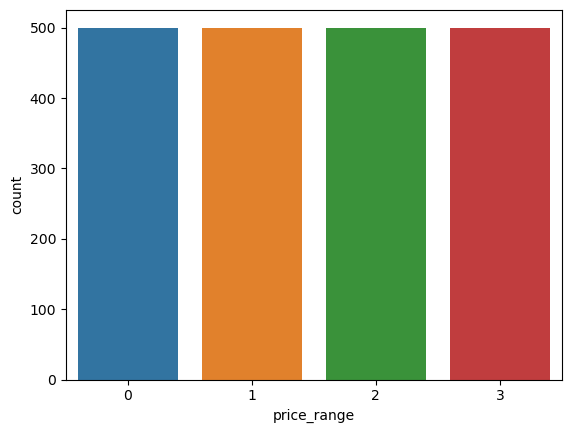

In [6]:
sns.countplot(df['price_range'])

In [7]:
# sns.pairplot(df)

<AxesSubplot:>

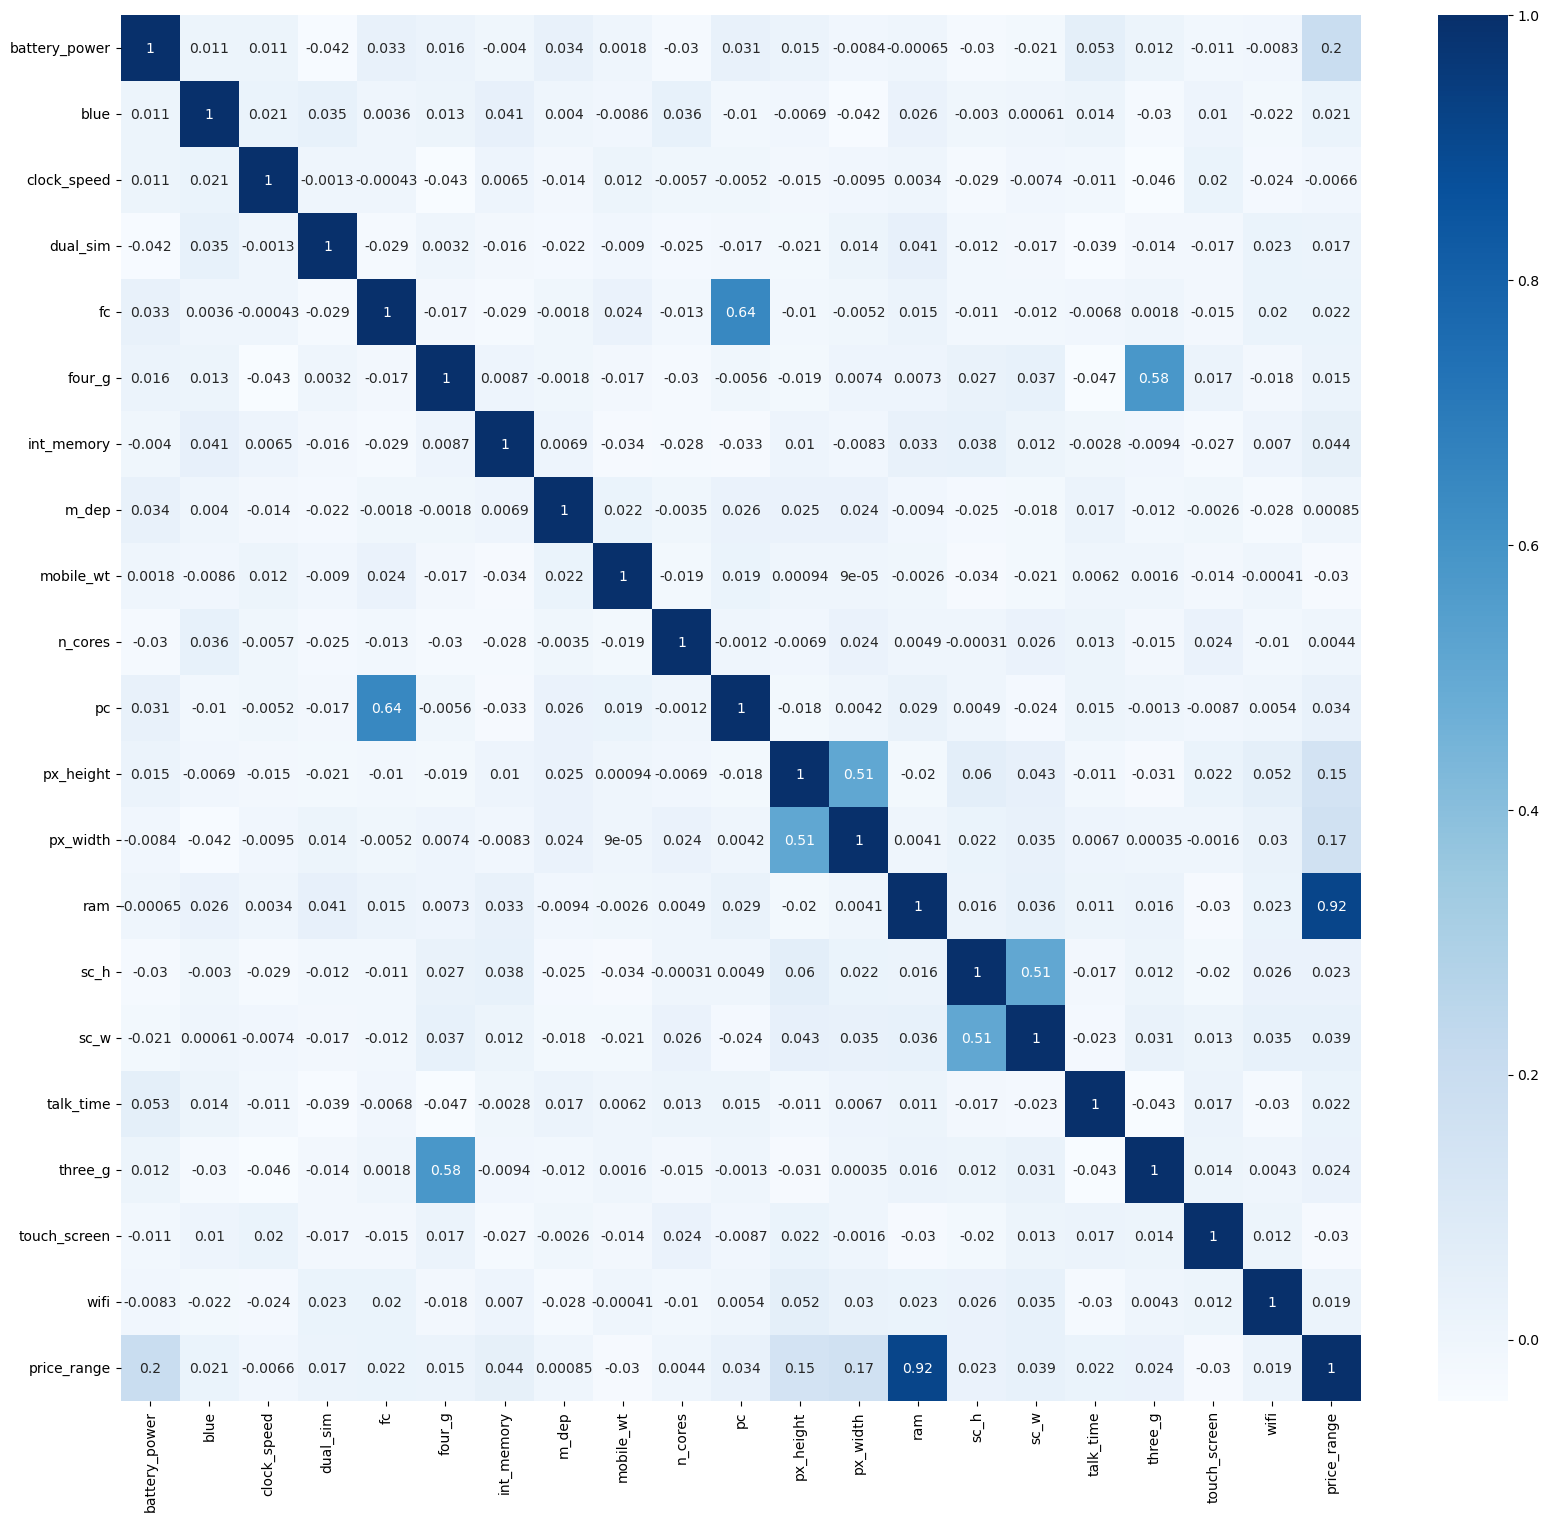

In [8]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:>

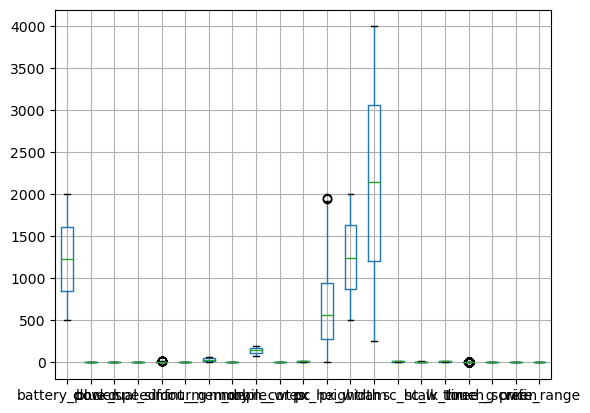

In [9]:
df.boxplot()

In [10]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=123,test_size=0.2)

In [12]:
nb=GaussianNB()

In [13]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [14]:
preds_train_nb=nb.predict(xtrain)
preds_test_nb=nb.predict(xtest)

In [15]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [16]:
report(ytrain,preds_train_nb)
report(ytest,preds_test_nb)

Accuracy of model is 81.5 %

  [[372  41   0   0]
 [ 33 291  76   0]
 [  0  67 277  40]
 [  0   1  38 364]]

               precision    recall  f1-score   support

           0       0.92      0.90      0.91       413
           1       0.73      0.73      0.73       400
           2       0.71      0.72      0.71       384
           3       0.90      0.90      0.90       403

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.82      0.81      0.82      1600

Accuracy of model is 82.0 %

  [[83  4  0  0]
 [ 8 79 13  0]
 [ 0 23 79 14]
 [ 0  0 10 87]]

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.75      0.79      0.77       100
           2       0.77      0.68      0.72       116
           3       0.86      0.90      0.88        97

    accuracy                           0.82       400
   macro avg       0.82      0.83  

In [17]:
svm=SVC(C=1.087,kernel='poly',degree=4)
svm.fit(xtrain,ytrain)

SVC(C=1.087, degree=4, kernel='poly')

In [18]:
preds_train_svm=svm.predict(xtrain)
preds_test_svm=svm.predict(xtest)

In [19]:
report(ytrain,preds_train_svm)
report(ytest,preds_test_svm)

Accuracy of model is 96.44 %

  [[413   0   0   0]
 [ 13 380   7   0]
 [  0  13 359  12]
 [  0   0  12 391]]

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       413
           1       0.97      0.95      0.96       400
           2       0.95      0.93      0.94       384
           3       0.97      0.97      0.97       403

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

Accuracy of model is 93.5 %

  [[ 87   0   0   0]
 [ 11  87   2   0]
 [  0   4 107   5]
 [  0   0   4  93]]

               precision    recall  f1-score   support

           0       0.89      1.00      0.94        87
           1       0.96      0.87      0.91       100
           2       0.95      0.92      0.93       116
           3       0.95      0.96      0.95        97

    accuracy                           0.94       400
   macro avg      